📊 PHÂN TÍCH BIẾN ĐỘNG GIÁ CỔ PHIẾU TSLA (2024)

In [381]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import os

In [382]:
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

# 1. Thu thập dữ liệu

In [383]:
companies = {
    'TSLA': 'Tesla Inc.',
    'NIO': 'NIO Inc.',
    'NVDA': 'NVIDIA Corporation'
}

start_date = '2024-1-1'
end_date = '2024-12-31'
data = {}

for symbol, name in companies.items():
    df = yf.download(symbol, start = start_date, end = end_date)
    df.reset_index(inplace = True)
    data[symbol] = df

    df['Symbol'] = symbol
    df['Company'] = name

    data[symbol] = df
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = df.columns.get_level_values(0)
    
data['TSLA'].head()

C:\Users\Mr Long\AppData\Local\Temp\ipykernel_18988\681422200.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start = start_date, end = end_date)
[*********************100%***********************]  1 of 1 completed
C:\Users\Mr Long\AppData\Local\Temp\ipykernel_18988\681422200.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start = start_date, end = end_date)
[*********************100%***********************]  1 of 1 completed
C:\Users\Mr Long\AppData\Local\Temp\ipykernel_18988\681422200.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start = start_date, end = end_date)
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume,Symbol,Company
0,2024-01-02,248.419998,251.250000,244.410004,250.080002,104654200,TSLA,Tesla Inc.
1,2024-01-03,238.449997,245.679993,236.320007,244.979996,121082600,TSLA,Tesla Inc.
2,2024-01-04,237.929993,242.699997,237.729996,239.250000,102629300,TSLA,Tesla Inc.
3,2024-01-05,237.490005,240.119995,234.899994,236.860001,92379400,TSLA,Tesla Inc.
4,2024-01-08,240.449997,241.250000,235.300003,236.139999,85166600,TSLA,Tesla Inc.


In [384]:
os.makedirs("../Data", exist_ok = True)

for symbol in data:
    file_path = f"../Data/{symbol}_2024.csv"
    try:
        data[symbol].to_csv(file_path, index=False)
        print(f"Đã lưu: {file_path}")
    except Exception as e:
        print(f"Lỗi lưu {symbol}: {e}")

Đã lưu: ../Data/TSLA_2024.csv
Đã lưu: ../Data/NIO_2024.csv
Đã lưu: ../Data/NVDA_2024.csv


# 2. Làm sạch và xử lí dữ liệu 

## Các bước thực hiện:
- Chuyển đổi cột `Date` về định dạng chuẩn `datetime`
- Xử lý các giá trị thiếu (NaN) nếu có
- Loại bỏ các dòng dữ liệu bị trùng lặp
- Xử lý giá trị ngoại lai (outliers) dựa vào chỉ số IQR trên cột `Close`

Việc làm sạch giúp dữ liệu chính xác và ổn định hơn khi tính toán các chỉ số kỹ thuật.

In [385]:
for symbol in data:
    print(f"Mã cổ phiếu {symbol}: ")

    df = data[symbol]

    # Chuyển cột Date sang datetime
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Kiểm tra và loại bỏ giá trị thiếu
    missing = df.isnull().sum()
    df.dropna(inplace=True)

    # Kiểm tra và loại bỏ dòng trùng lặp
    duplicate_rows = df.duplicated().sum()
    if duplicate_rows > 0:
        print(f"- Có {duplicate_rows} dòng bị trùng")
        df.drop_duplicates(inplace=True)
        print("Đã xóa")
    else:
        print("- Dữ liệu không có giá trị trùng")

    #
    Q1 = df['Close'].quantile(0.25)
    Q3 = df['Close'].quantile(0.75)
    IQR = Q3 - Q1
    condition = (df['Close'] < (Q1 - 1.5 * IQR)) | (df['Close'] > (Q3 + 1.5 * IQR))
    outliers = df[condition]

    if not outliers.empty:
        print(f"- IQR: Có {len(outliers)} outliers được phát hiện")
        print(outliers)
    else:
        print("- IQR: Không có outliers")
    print('\n')
    print('-' * 80)
    
    


Mã cổ phiếu TSLA: 
- Dữ liệu không có giá trị trùng
- IQR: Có 21 outliers được phát hiện
Price       Date       Close        High         Low        Open     Volume  \
226   2024-11-22  352.559998  361.529999  337.700012  341.089996   89140700   
231   2024-12-02  357.089996  360.000000  351.149994  352.380005   77986500   
232   2024-12-03  351.420013  355.690002  348.200012  351.799988   58267200   
233   2024-12-04  357.929993  358.100006  348.600006  353.000000   50810900   
234   2024-12-05  369.489990  375.429993  359.500000  359.869995   81403600   
235   2024-12-06  389.220001  389.489990  370.799988  377.420013   81455800   
236   2024-12-09  389.790009  404.799988  378.010010  397.609985   96359200   
237   2024-12-10  400.989990  409.730011  390.850006  392.679993   97563600   
238   2024-12-11  424.769989  424.880005  402.380005  409.700012  104287600   
239   2024-12-12  418.100006  429.299988  415.000000  424.839996   87752200   
240   2024-12-13  436.230011  436.299988  

# 3.Tính toán chỉ số cơ bản

- SMA (Simple Moving Average) là trung bình cộng của giá đóng cửa trong một khoảng thời gian nhất định. SMA giúp làm mượt dữ liệu giá và xác định xu hướng ngắn hạn hoặc dài hạn của cổ phiếu.
- Trong phân tích này, ta tính SMA 20 và SMA 50 cho mỗi mã cổ phiếu (TSLA, NIO, NVDA).

In [386]:
for symbol, df in data.items():
    df['SMA_20'] = df['Close'].rolling(window=20).mean()
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    print(f"SMA cho mã: {symbol}")
    display(df[['Date', 'Close', 'SMA_20', 'SMA_50']])
    print("-" * 50)

SMA cho mã: TSLA


Price,Date,Close,SMA_20,SMA_50
0,2024-01-02,248.419998,NaN,NaN
1,2024-01-03,238.449997,NaN,NaN
2,2024-01-04,237.929993,NaN,NaN
3,2024-01-05,237.490005,NaN,NaN
4,2024-01-08,240.449997,NaN,NaN
...,...,...,...,...
246,2024-12-23,430.600006,396.037001,324.8296
247,2024-12-24,462.279999,402.221501,329.6920
248,2024-12-26,454.130005,408.016501,334.3832
249,2024-12-27,431.660004,412.955000,338.5898


--------------------------------------------------
SMA cho mã: NIO


Price,Date,Close,SMA_20,SMA_50
0,2024-01-02,8.42,NaN,NaN
1,2024-01-03,8.50,NaN,NaN
2,2024-01-04,8.27,NaN,NaN
3,2024-01-05,8.06,NaN,NaN
4,2024-01-08,7.93,NaN,NaN
...,...,...,...,...
246,2024-12-23,4.48,4.5560,4.8730
247,2024-12-24,4.62,4.5535,4.8496
248,2024-12-26,4.69,4.5725,4.8310
249,2024-12-27,4.48,4.5775,4.8104


--------------------------------------------------
SMA cho mã: NVDA


Price,Date,Close,SMA_20,SMA_50
0,2024-01-02,48.146572,NaN,NaN
1,2024-01-03,47.547836,NaN,NaN
2,2024-01-04,47.976650,NaN,NaN
3,2024-01-05,49.075153,NaN,NaN
4,2024-01-08,52.229752,NaN,NaN
...,...,...,...,...
246,2024-12-23,139.647446,136.934048,139.688259
247,2024-12-24,140.197372,137.144483,139.731442
248,2024-12-26,139.907410,137.295430,139.898196
249,2024-12-27,136.987885,137.379383,139.924179


--------------------------------------------------


- EMA (Exponential Moving Average) là trung bình giá có trọng số, nhấn mạnh các giá trị gần nhất trong chuỗi thời gian.
- EMA nhạy hơn với biến động giá và giúp theo dõi xu hướng gần đây hiệu quả hơn.

In [387]:
for symbol, df in data.items():
    df['EMA_20'] = df['Close'].ewm(span=20, adjust=False).mean()
    print(f"EMA cho mã: {symbol}")
    display(df[['Date', 'Close', 'SMA_20', 'SMA_50', 'EMA_20']])
    print('-' * 65)

EMA cho mã: TSLA


Price,Date,Close,SMA_20,SMA_50,EMA_20
0,2024-01-02,248.419998,NaN,NaN,248.419998
1,2024-01-03,238.449997,NaN,NaN,247.470474
2,2024-01-04,237.929993,NaN,NaN,246.561857
3,2024-01-05,237.490005,NaN,NaN,245.697871
4,2024-01-08,240.449997,NaN,NaN,245.198074
...,...,...,...,...,...
246,2024-12-23,430.600006,396.037001,324.8296,401.852614
247,2024-12-24,462.279999,402.221501,329.6920,407.607603
248,2024-12-26,454.130005,408.016501,334.3832,412.038308
249,2024-12-27,431.660004,412.955000,338.5898,413.907041


-----------------------------------------------------------------
EMA cho mã: NIO


Price,Date,Close,SMA_20,SMA_50,EMA_20
0,2024-01-02,8.42,NaN,NaN,8.420000
1,2024-01-03,8.50,NaN,NaN,8.427619
2,2024-01-04,8.27,NaN,NaN,8.412608
3,2024-01-05,8.06,NaN,NaN,8.379026
4,2024-01-08,7.93,NaN,NaN,8.336262
...,...,...,...,...,...
246,2024-12-23,4.48,4.5560,4.8730,4.589652
247,2024-12-24,4.62,4.5535,4.8496,4.592542
248,2024-12-26,4.69,4.5725,4.8310,4.601824
249,2024-12-27,4.48,4.5775,4.8104,4.590222


-----------------------------------------------------------------
EMA cho mã: NVDA


Price,Date,Close,SMA_20,SMA_50,EMA_20
0,2024-01-02,48.146572,NaN,NaN,48.146572
1,2024-01-03,47.547836,NaN,NaN,48.089550
2,2024-01-04,47.976650,NaN,NaN,48.078797
3,2024-01-05,49.075153,NaN,NaN,48.173688
4,2024-01-08,52.229752,NaN,NaN,48.559980
...,...,...,...,...,...
246,2024-12-23,139.647446,136.934048,139.688259,136.684416
247,2024-12-24,140.197372,137.144483,139.731442,137.018984
248,2024-12-26,139.907410,137.295430,139.898196,137.294072
249,2024-12-27,136.987885,137.379383,139.924179,137.264911


-----------------------------------------------------------------


- RSI (Relative Strength Index) là chỉ báo dao động đo lường tốc độ và thay đổi của biến động giá.

- Thường tính theo 14 ngày.
- RSI dao động từ 0 đến 100:
  - RSI > 70 → cổ phiếu đang bị mua quá mức (overbought)
  - RSI < 30 → cổ phiếu đang bị bán quá mức (oversold)

- RSI giúp nhà đầu tư xác định thời điểm mua vào/bán ra hợp lý hơn.

In [388]:
def compute_rsi(series, period: int = 14):
    delta = series.diff()
    gain = np.where(delta > 0, delta, 0)
    loss = np.where(delta < 0, -delta, 0)

    avg_gain = pd.Series(gain).rolling(window=period).mean()
    avg_loss = pd.Series(loss).rolling(window=period).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return pd.Series(rsi, index=series.index)

for symbol, df in data.items():
    df['RSI_14'] = compute_rsi(df['Close'], period=14)
    print(f"RSI cho mã: {symbol}")
    display(df[['Date', 'Close', 'SMA_20', 'SMA_50', 'EMA_20', 'RSI_14']])
    print('-' * 70)

RSI cho mã: TSLA


Price,Date,Close,SMA_20,SMA_50,EMA_20,RSI_14
0,2024-01-02,248.419998,NaN,NaN,248.419998,NaN
1,2024-01-03,238.449997,NaN,NaN,247.470474,NaN
2,2024-01-04,237.929993,NaN,NaN,246.561857,NaN
3,2024-01-05,237.490005,NaN,NaN,245.697871,NaN
4,2024-01-08,240.449997,NaN,NaN,245.198074,NaN
...,...,...,...,...,...,...
246,2024-12-23,430.600006,396.037001,324.8296,401.852614,68.841618
247,2024-12-24,462.279999,402.221501,329.6920,407.607603,72.174769
248,2024-12-26,454.130005,408.016501,334.3832,412.038308,68.250827
249,2024-12-27,431.660004,412.955000,338.5898,413.907041,59.044415


----------------------------------------------------------------------
RSI cho mã: NIO


Price,Date,Close,SMA_20,SMA_50,EMA_20,RSI_14
0,2024-01-02,8.42,NaN,NaN,8.420000,NaN
1,2024-01-03,8.50,NaN,NaN,8.427619,NaN
2,2024-01-04,8.27,NaN,NaN,8.412608,NaN
3,2024-01-05,8.06,NaN,NaN,8.379026,NaN
4,2024-01-08,7.93,NaN,NaN,8.336262,NaN
...,...,...,...,...,...,...
246,2024-12-23,4.48,4.5560,4.8730,4.589652,46.000002
247,2024-12-24,4.62,4.5535,4.8496,4.592542,50.476190
248,2024-12-26,4.69,4.5725,4.8310,4.601824,51.851851
249,2024-12-27,4.48,4.5775,4.8104,4.590222,47.257380


----------------------------------------------------------------------
RSI cho mã: NVDA


Price,Date,Close,SMA_20,SMA_50,EMA_20,RSI_14
0,2024-01-02,48.146572,NaN,NaN,48.146572,NaN
1,2024-01-03,47.547836,NaN,NaN,48.089550,NaN
2,2024-01-04,47.976650,NaN,NaN,48.078797,NaN
3,2024-01-05,49.075153,NaN,NaN,48.173688,NaN
4,2024-01-08,52.229752,NaN,NaN,48.559980,NaN
...,...,...,...,...,...,...
246,2024-12-23,139.647446,136.934048,139.688259,136.684416,49.280664
247,2024-12-24,140.197372,137.144483,139.731442,137.018984,43.182444
248,2024-12-26,139.907410,137.295430,139.898196,137.294072,42.920219
249,2024-12-27,136.987885,137.379383,139.924179,137.264911,42.567751


----------------------------------------------------------------------


# 4. Phân tích dữ liệu

## Tính lợi suất hàng ngày (Daily Return)

- Lợi suất hàng ngày được tính bằng phần trăm thay đổi giá đóng cửa giữa 2 phiên liên tiếp. Chỉ số này giúp đánh giá hiệu suất cổ phiếu trong ngắn hạn.

In [389]:
for symbol, df in data.items():
    df['Daily_Return'] = df['Close'].pct_change()
    print(f"Lợi suất ngày cho mã: {symbol}")
    display(df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'SMA_20', 'SMA_50', 'EMA_20', 'RSI_14', 'Daily_Return']])
    print('-' * 130)

Lợi suất ngày cho mã: TSLA


Price,Date,Open,High,Low,Close,Volume,SMA_20,SMA_50,EMA_20,RSI_14,Daily_Return
0,2024-01-02,250.080002,251.250000,244.410004,248.419998,104654200,NaN,NaN,248.419998,NaN,NaN
1,2024-01-03,244.979996,245.679993,236.320007,238.449997,121082600,NaN,NaN,247.470474,NaN,-0.040134
2,2024-01-04,239.250000,242.699997,237.729996,237.929993,102629300,NaN,NaN,246.561857,NaN,-0.002181
3,2024-01-05,236.860001,240.119995,234.899994,237.490005,92379400,NaN,NaN,245.697871,NaN,-0.001849
4,2024-01-08,236.139999,241.250000,235.300003,240.449997,85166600,NaN,NaN,245.198074,NaN,0.012464
...,...,...,...,...,...,...,...,...,...,...,...
246,2024-12-23,431.000000,434.510010,415.410004,430.600006,72698100,396.037001,324.8296,401.852614,68.841618,0.022657
247,2024-12-24,435.899994,462.779999,435.140015,462.279999,59551800,402.221501,329.6920,407.607603,72.174769,0.073572
248,2024-12-26,465.160004,465.329987,451.019989,454.130005,76366400,408.016501,334.3832,412.038308,68.250827,-0.017630
249,2024-12-27,449.519989,450.000000,426.500000,431.660004,82666800,412.955000,338.5898,413.907041,59.044415,-0.049479


----------------------------------------------------------------------------------------------------------------------------------
Lợi suất ngày cho mã: NIO


Price,Date,Open,High,Low,Close,Volume,SMA_20,SMA_50,EMA_20,RSI_14,Daily_Return
0,2024-01-02,8.93,8.94,8.38,8.42,81640300,NaN,NaN,8.420000,NaN,NaN
1,2024-01-03,8.12,8.56,8.10,8.50,58659300,NaN,NaN,8.427619,NaN,0.009501
2,2024-01-04,8.33,8.47,8.25,8.27,38412300,NaN,NaN,8.412608,NaN,-0.027059
3,2024-01-05,8.16,8.25,8.03,8.06,40604100,NaN,NaN,8.379026,NaN,-0.025393
4,2024-01-08,7.86,8.05,7.73,7.93,49933600,NaN,NaN,8.336262,NaN,-0.016129
...,...,...,...,...,...,...,...,...,...,...,...
246,2024-12-23,4.50,4.55,4.47,4.48,32756000,4.5560,4.8730,4.589652,46.000002,-0.013216
247,2024-12-24,4.51,4.68,4.51,4.62,24244400,4.5535,4.8496,4.592542,50.476190,0.031250
248,2024-12-26,4.63,4.83,4.61,4.69,33687400,4.5725,4.8310,4.601824,51.851851,0.015152
249,2024-12-27,4.64,4.65,4.48,4.48,41203600,4.5775,4.8104,4.590222,47.257380,-0.044776


----------------------------------------------------------------------------------------------------------------------------------
Lợi suất ngày cho mã: NVDA


Price,Date,Open,High,Low,Close,Volume,SMA_20,SMA_50,EMA_20,RSI_14,Daily_Return
0,2024-01-02,49.222094,49.273070,47.573829,48.146572,411254000,NaN,NaN,48.146572,NaN,NaN
1,2024-01-03,47.463874,48.162561,47.298947,47.547836,320896000,NaN,NaN,48.089550,NaN,-0.012436
2,2024-01-04,47.745750,48.478426,47.486867,47.976650,306535000,NaN,NaN,48.078797,NaN,0.009019
3,2024-01-05,48.440438,49.524954,48.284505,49.075153,415039000,NaN,NaN,48.173688,NaN,0.022897
4,2024-01-08,49.489974,52.251745,49.456987,52.229752,642510000,NaN,NaN,48.559980,NaN,0.064281
...,...,...,...,...,...,...,...,...,...,...,...
246,2024-12-23,136.257994,139.767421,135.098177,139.647446,176053500,136.934048,139.688259,136.684416,49.280664,0.036897
247,2024-12-24,139.977407,141.877094,138.627618,140.197372,105157000,137.144483,139.731442,137.018984,43.182444,0.003938
248,2024-12-26,139.677451,140.827275,137.707768,139.907410,116205600,137.295430,139.898196,137.294072,42.920219,-0.002068
249,2024-12-27,138.527645,138.997570,134.688268,136.987885,170582600,137.379383,139.924179,137.264911,42.567751,-0.020868


----------------------------------------------------------------------------------------------------------------------------------


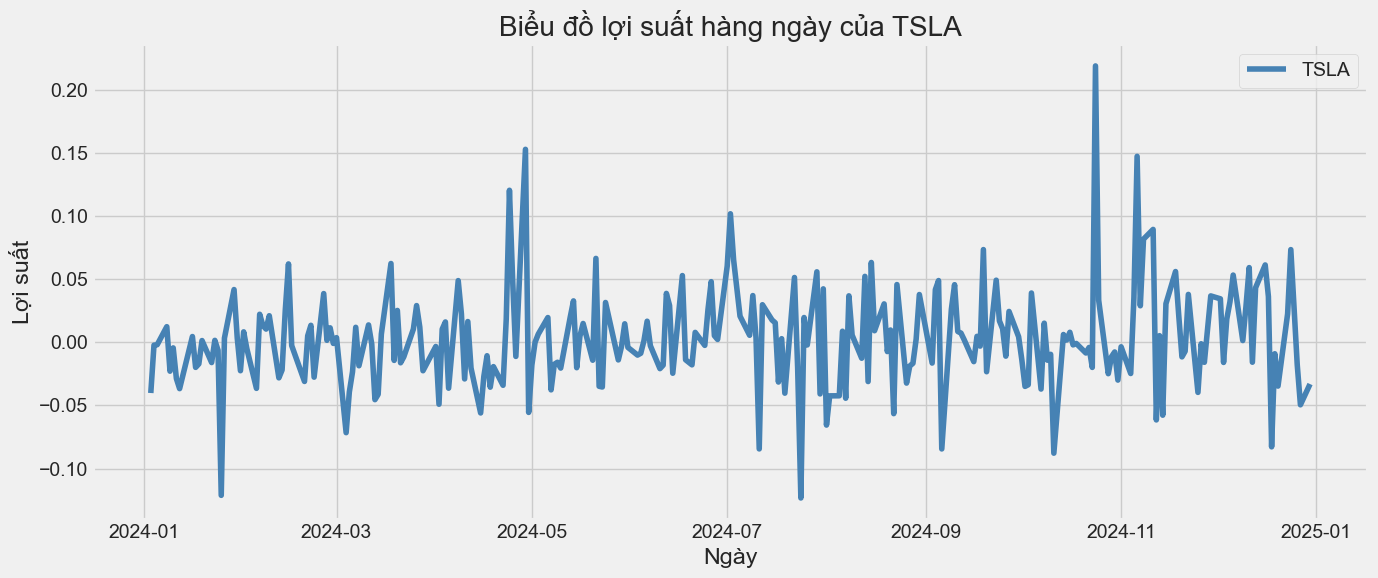

In [390]:
plt.figure(figsize=(14,6))
plt.plot(data['TSLA']['Date'], data['TSLA']['Daily_Return'], color=('SteelBlue'), label='TSLA')
plt.title('Biểu đồ lợi suất hàng ngày của TSLA')
plt.xlabel('Ngày')
plt.ylabel('Lợi suất')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


- Phân phối lợi suất cho biết cách lợi suất hàng ngày phân bố quanh giá trị trung bình. Biểu đồ histogram kèm đường mật độ (KDE) giúp đánh giá rủi ro và tính bất đối xứng của dữ liệu.

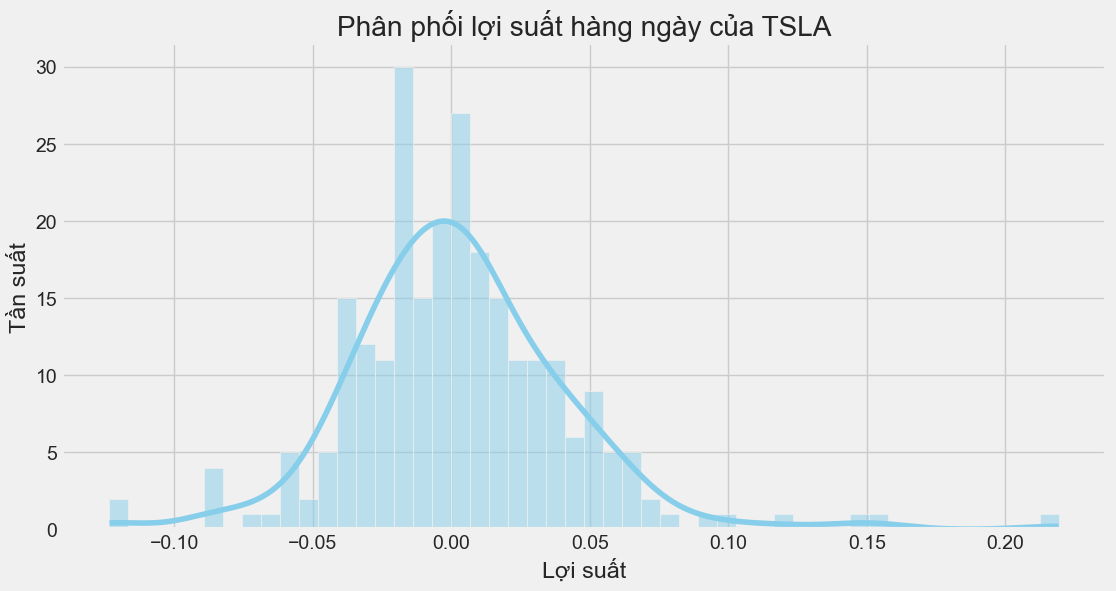

In [391]:
plt.figure(figsize=(12,6))
sns.histplot(data['TSLA']['Daily_Return'].dropna(), bins=50, kde=True, color='skyblue')
plt.title('Phân phối lợi suất hàng ngày của TSLA')
plt.xlabel('Lợi suất')
plt.ylabel('Tần suất')
plt.grid(True)
plt.show()

## Độ biến động (volatility) được tính bằng độ lệch chuẩn của lợi suất theo tháng. Giá trị cao thể hiện mức dao động lớn trong tháng đó, thường đi kèm với rủi ro cao hơn.

In [392]:
monthly_volatility_all = {}

for symbol in data:
    data[symbol]['Month'] = data[symbol]['Date'].dt.to_period('M')
    volatility = data[symbol].groupby('Month')['Daily_Return'].std()
    monthly_volatility_all[symbol] = volatility

volatility_df = pd.DataFrame(monthly_volatility_all)
volatility_df

,TSLA,NIO,NVDA
Month,,,
2024-01,0.031468,0.027425,0.019786
2024-02,0.024804,0.047174,0.043006
2024-03,0.030467,0.034713,0.030338
2024-04,0.053034,0.041144,0.036120
2024-05,0.025626,0.051496,0.031995
2024-06,0.023516,0.031918,0.033630
2024-07,0.051205,0.040736,0.044995
2024-08,0.036885,0.039883,0.041371
2024-09,0.034044,0.061838,0.036101


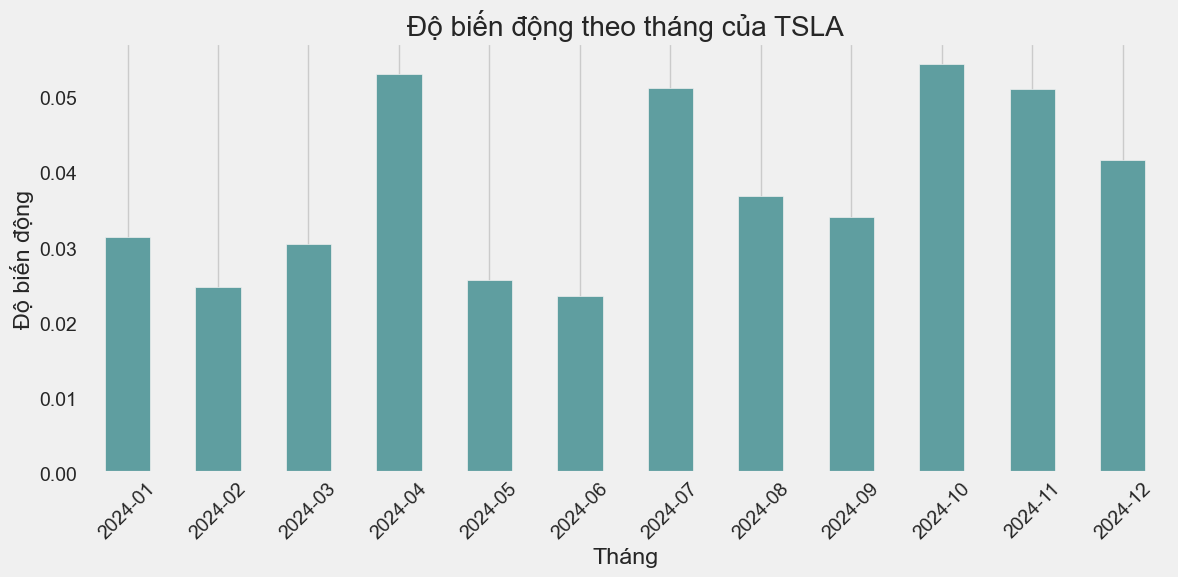

In [393]:
plt.figure(figsize=(12,6))
monthly_volatility_all['TSLA'].plot(kind='bar', color='CadetBlue')
plt.title('Độ biến động theo tháng của TSLA')
plt.xlabel('Tháng')
plt.ylabel('Độ biến động')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Phân tích tương quan giúp xác định mức độ phụ thuộc giữa các biến như giá đóng cửa (Close), trung bình động (SMA, EMA) và RSI.

In [394]:
correlation = pd.DataFrame(columns=['Close/SMA_20', 'Close/SMA_50', 'Close/RSI_14'])

for symbol, df in data.items():
    corr_sma20 = df['Close'].corr(df['SMA_20'])
    corr_sma50 = df['Close'].corr(df['SMA_50'])
    corr_rsi = df['Close'].corr(df['RSI_14'])

    correlation.loc[symbol] = [corr_sma20, corr_sma50, corr_rsi]

correlation


,Close/SMA_20,Close/SMA_50,Close/RSI_14
TSLA,0.953659,0.929223,0.555673
NIO,0.700996,0.088347,0.325613
NVDA,0.944212,0.830322,-0.232572


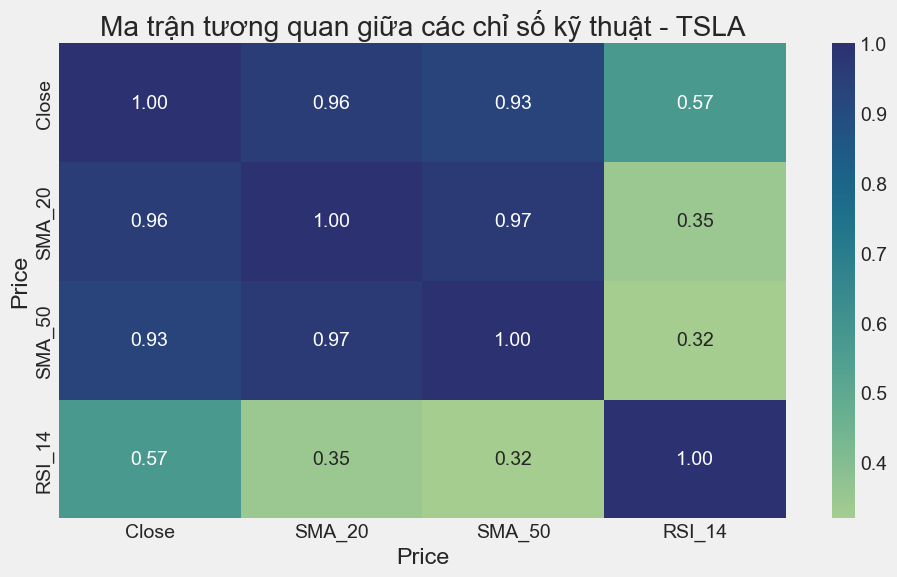

In [395]:
tsla_corr = data['TSLA'][['Close', 'SMA_20', 'SMA_50', 'RSI_14']].dropna()

plt.figure(figsize=(10,6))
sns.heatmap(tsla_corr.corr(), annot=True, cmap='crest', fmt=".2f")
plt.title('Ma trận tương quan giữa các chỉ số kỹ thuật - TSLA')
plt.tight_layout()
plt.show()

# 5. Trực quan hóa dữ liệu

- Biểu đồ giá đóng cửa TSLA kèm theo SMA và EMA

- Biểu đồ dưới đây minh họa sự thay đổi giá đóng cửa của cổ phiếu TSLA trong năm 2024, đồng thời trực quan hóa hai chỉ báo phân tích kỹ thuật phổ biến

- Các đường trung bình giúp phát hiện xu hướng giá dài hạn (SMA_50), ngắn hạn (SMA_20) và phản ứng nhanh hơn với thay đổi (EMA20).

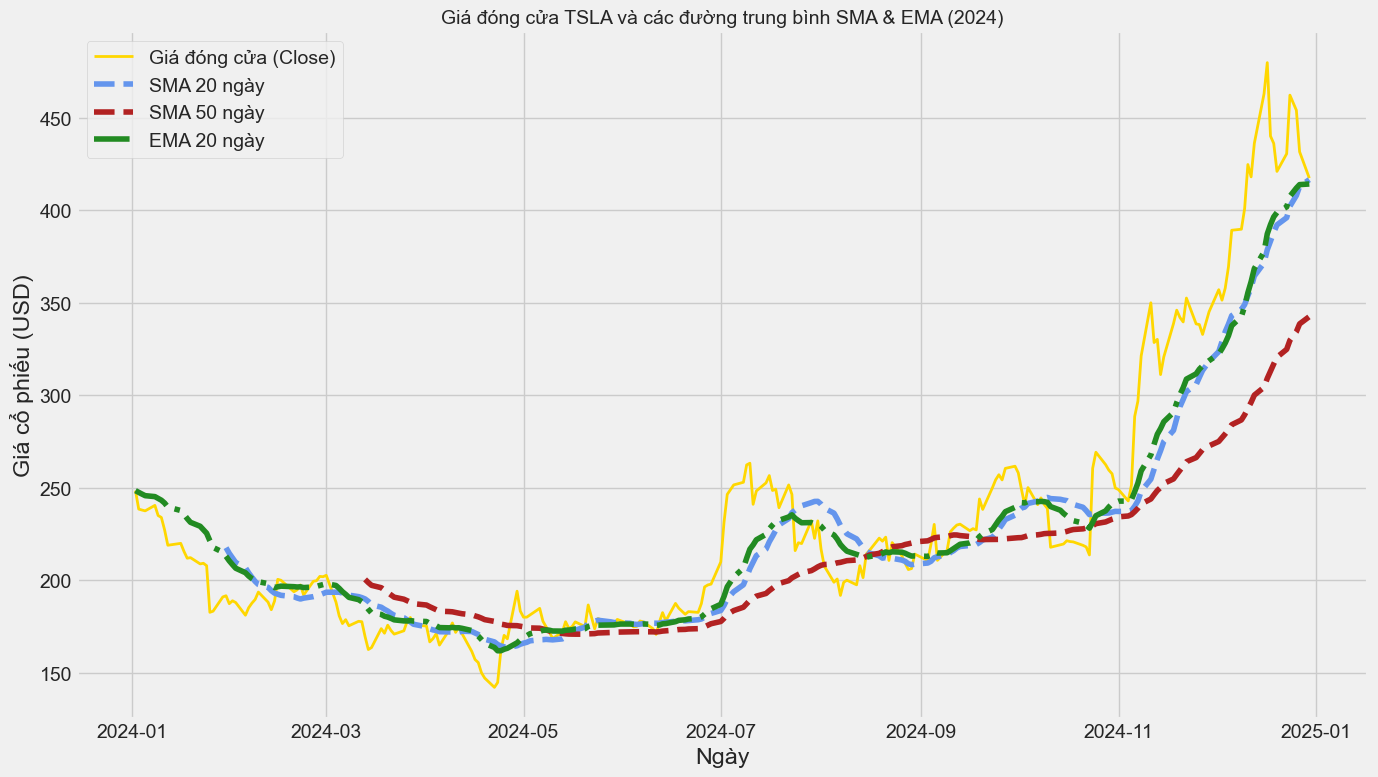

In [396]:
plt.figure(figsize=(14, 8))

tsla = data['TSLA']

plt.plot(tsla['Date'], tsla['Close'], label='Giá đóng cửa (Close)', color='gold', linewidth=2)
plt.plot(tsla['Date'], tsla['SMA_20'], label='SMA 20 ngày', color='CornflowerBlue', linestyle='--')
plt.plot(tsla['Date'], tsla['SMA_50'], label='SMA 50 ngày', color='Firebrick', linestyle='--')
plt.plot(tsla['Date'], tsla['EMA_20'], label='EMA 20 ngày', color='ForestGreen', linestyle='-.')

plt.title('Giá đóng cửa TSLA và các đường trung bình SMA & EMA (2024)', fontsize=14)
plt.xlabel('Ngày')
plt.ylabel('Giá cổ phiếu (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 6. So sánh cổ phiếu TSLA, NIO và NVDA

- Phần này sẽ trình bày so sánh hiệu suất, mức độ biến động và mối tương quan giữa ba mã cổ phiếu TSLA, NIO và NVDA. Từ đó, nhà đầu tư có thể đánh giá mã cổ phiếu nào phù hợp hơn với chiến lược đầu tư cá nhân.

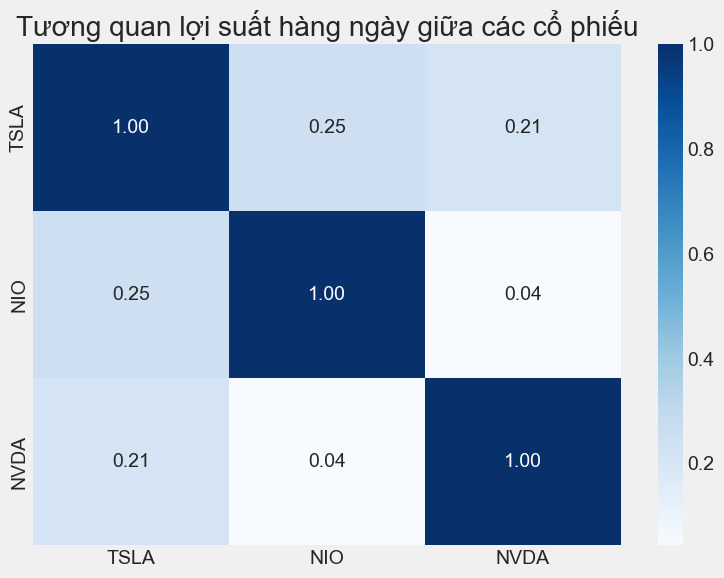

In [397]:
prices = pd.DataFrame({
    symbol: data[symbol]['Daily_Return'].values for symbol in data
}, index=data['TSLA']['Daily_Return'])

plt.figure(figsize=(8,6))
sns.heatmap(prices.corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title('Tương quan lợi suất hàng ngày giữa các cổ phiếu')
plt.tight_layout()
plt.show()

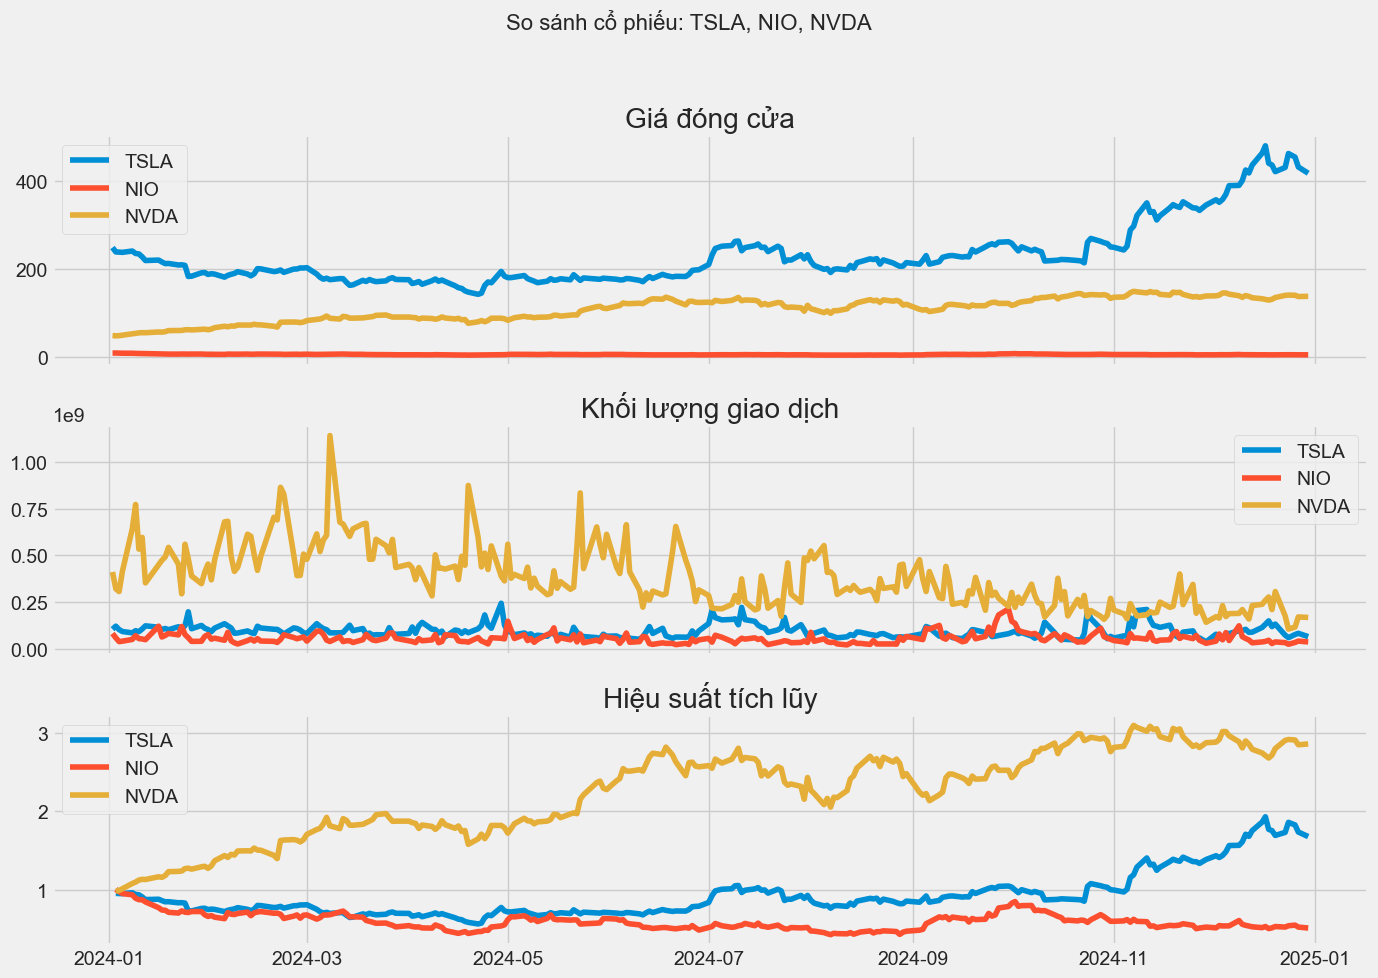

In [398]:
for symbol in data:
    data[symbol]['Daily_Return'] = data[symbol]['Close'].pct_change()
    data[symbol]['Cumulative Return'] = (1 + data[symbol]['Daily_Return']).cumprod()
    
fig, axs = plt.subplots(3, 1, figsize=(14,10), sharex=True)
fig.suptitle("So sánh cổ phiếu: TSLA, NIO, NVDA", fontsize=16)

for symbol in data:
    axs[0].plot(data[symbol]['Date'], data[symbol]['Close'], label=symbol)
axs[0].set_title("Giá đóng cửa")
axs[0].legend()
axs[0].grid(True)

for symbol in data:
    axs[1].plot(data[symbol]['Date'], data[symbol]['Volume'], label=symbol)
axs[1].set_title("Khối lượng giao dịch")
axs[1].legend()
axs[1].grid(True)

for symbol in data:
    axs[2].plot(data[symbol]['Date'], data[symbol]['Cumulative Return'], label=symbol)
axs[2].set_title("Hiệu suất tích lũy")
axs[2].legend()
axs[2].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

C:\Users\Mr Long\AppData\Local\Temp\ipykernel_18988\3517610143.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tsla = yf.download("TSLA", start="2010-01-01", end="2025-12-31")
[*********************100%***********************]  1 of 1 completed


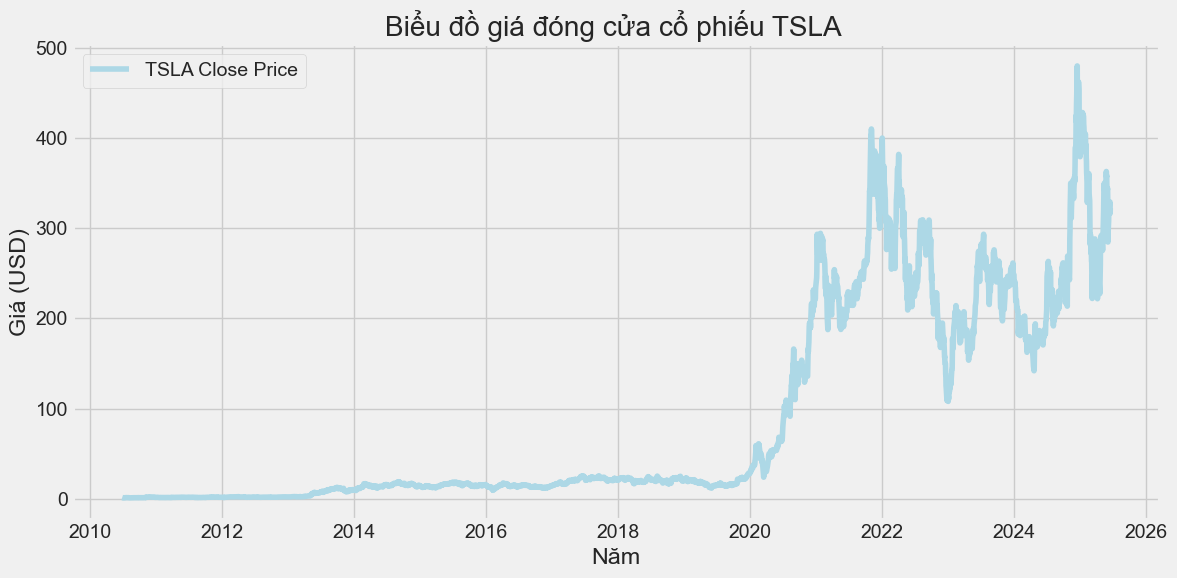

In [399]:
tsla = yf.download("TSLA", start="2010-01-01", end="2025-12-31")

plt.figure(figsize=(12, 6))
plt.plot(tsla.index, tsla["Close"], label="TSLA Close Price", color='lightblue')
plt.title("Biểu đồ giá đóng cửa cổ phiếu TSLA ")
plt.xlabel("Năm")
plt.ylabel("Giá (USD)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()